In [36]:
import numpy as np
from nltk import tokenize
import ngram
import utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [39]:
TRAIN_DATA_PATH = 'data/raw_train.txt'
VAL_DATA_PATH = 'data/raw_validation.txt'
train_corpus = utils.process_data(TRAIN_DATA_PATH)
val_corpus = utils.process_data(VAL_DATA_PATH)

In [3]:
len(train_corpus), len(val_corpus)

(29242, 1703)

In [6]:
### How does ngram size affect perplexity?

In [13]:
ngram_sizes = np.arange(1, 6)
perplexity_val = []
perplexity_train = []
for n in ngram_sizes:
    print(f'Training {n}-gram li and lapalce model...')
    li_model = ngram.NGRAM_Model(n, scoring_method='LI_grid_search')
    li_model.train(train_corpus)
    laplace_model = ngram.NGRAM_Model(n, scoring_method='laplace')
    laplace_model.train(train_corpus)
    li_perp_val = np.mean([li_model.perplexity(val_sent) for val_sent in val_corpus])
    li_perp_train = np.mean([li_model.perplexity(train_sent) for train_sent in train_corpus])
    laplace_perp_val = np.mean([laplace_model.perplexity(val_sent) for val_sent in val_corpus])
    laplace_perp_train = np.mean([laplace_model.perplexity(train_sent) for train_sent in train_corpus])
    perplexity_val.append((li_perp_val, laplace_perp_val))
    perplexity_train.append((li_perp_train, laplace_perp_train))

perplexity_val, perplexity_train

Training 1-gram li and lapalce model...
Training 2-gram li and lapalce model...
Training 3-gram li and lapalce model...
Training 4-gram li and lapalce model...
Training 5-gram li and lapalce model...


([(498.96002696297546, 500.7765598186736),
  (169.08663058868066, 296.3349641186613),
  (82.80656365046228, 520.1035329680603),
  (44.31913349795759, 334.81343234200807),
  (24.083380004768777, 157.90655431668347)],
 [(782.8358803681873, 790.9674936582741),
  (91.64970867374817, 394.2546241219629),
  (33.62842507003813, 384.6871632205911),
  (14.403720472487384, 203.17112721446412),
  (6.939909128583084, 95.92563265940154)])

In [21]:
li_perps_train, laplace_perps_train = zip(*perplexity_train)
li_perps_val, laplace_perps_val = zip(*perplexity_val)

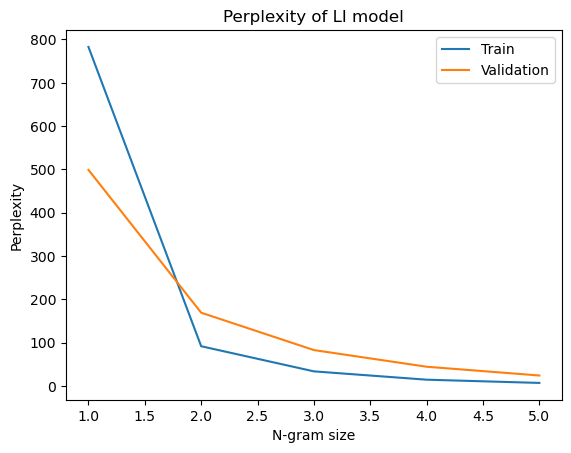

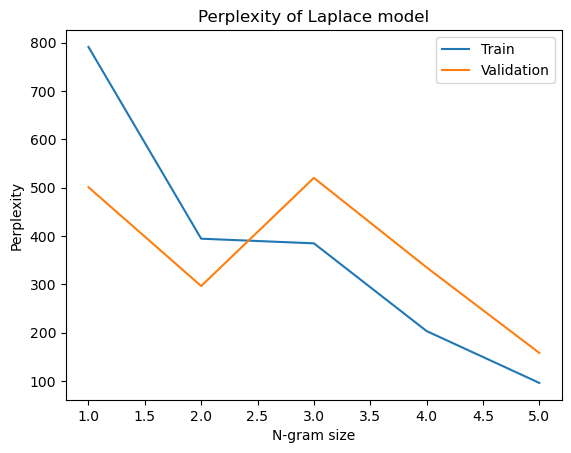

In [35]:
def plot_perplexity(ngram_sizes, perplexity_train, perplexity_val, title, file_name=None):
    fig, ax = plt.subplots()
    ax.plot(ngram_sizes, perplexity_train, label='Train')
    ax.plot(ngram_sizes, perplexity_val, label='Validation')
    ax.set_xlabel('N-gram size')
    ax.set_ylabel('Perplexity')
    ax.set_title(title)
    ax.legend()
    if file_name:
        plt.savefig(file_name)
    else:
        plt.show()

plot_perplexity(ngram_sizes, li_perps_train, li_perps_val, 'Perplexity of LI model', './figs/li_perplexity_sizes.png')
plot_perplexity(ngram_sizes, laplace_perps_train, laplace_perps_val, 'Perplexity of Laplace model', './figs/laplace_perplexity_sizes.png')

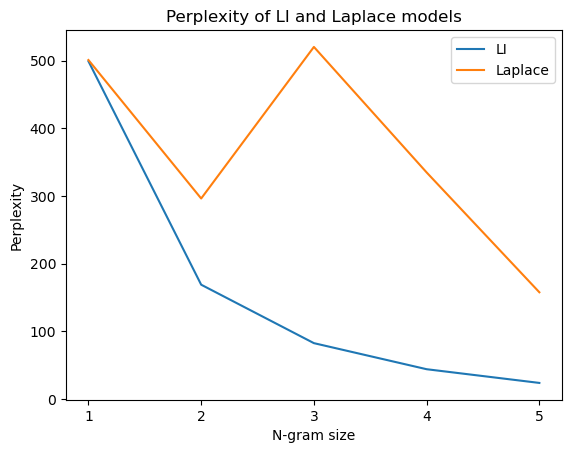

In [34]:
# Plot laplace vs li perplexity on validation set
plt.plot(ngram_sizes, li_perps_val, label='LI')
plt.plot(ngram_sizes, laplace_perps_val, label='Laplace')
plt.xlabel('N-gram size')
plt.ylabel('Perplexity')
plt.xticks(ngram_sizes)
plt.title('Perplexity of LI and Laplace models')
plt.legend()
plt.savefig('./figs/li_vs_laplace_perplexity_size.png')

In [46]:

train_sizes = np.arange(1,6) / 5
ngram_size = 4
perplexity_val = []
perplexity_train = []
for train_size in train_sizes:
    if train_size == 1:
        tc = train_corpus
    else:
        tc, rest = train_test_split(train_corpus, train_size=train_size)
    print(f'Training {ngram_size}-gram li and lapalce model on {train_size:.0%} of training data...')
    li_model = ngram.NGRAM_Model(ngram_size, scoring_method='LI_grid_search')
    li_model.train(tc)
    laplace_model = ngram.NGRAM_Model(ngram_size, scoring_method='laplace')
    laplace_model.train(tc)
    li_perp_val = np.mean([li_model.perplexity(val_sent) for val_sent in val_corpus])
    li_perp_train = np.mean([li_model.perplexity(train_sent) for train_sent in tc])
    laplace_perp_val = np.mean([laplace_model.perplexity(val_sent) for val_sent in val_corpus])
    laplace_perp_train = np.mean([laplace_model.perplexity(train_sent) for train_sent in tc])
    perplexity_val.append((li_perp_val, laplace_perp_val))
    perplexity_train.append((li_perp_train, laplace_perp_train))

Training 4-gram li and lapalce model on 20% of training data...
Training 4-gram li and lapalce model on 40% of training data...
Training 4-gram li and lapalce model on 60% of training data...
Training 4-gram li and lapalce model on 80% of training data...
Training 4-gram li and lapalce model on 100% of training data...


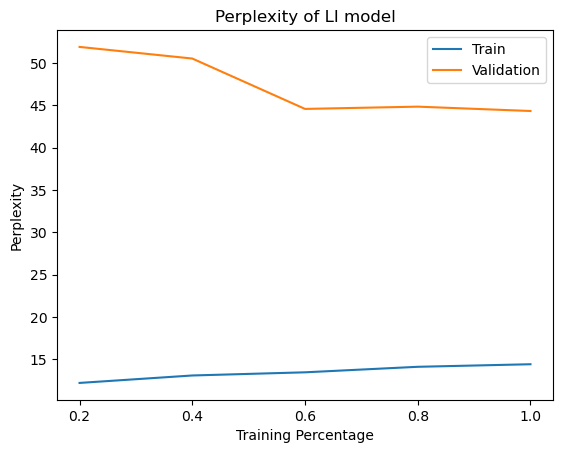

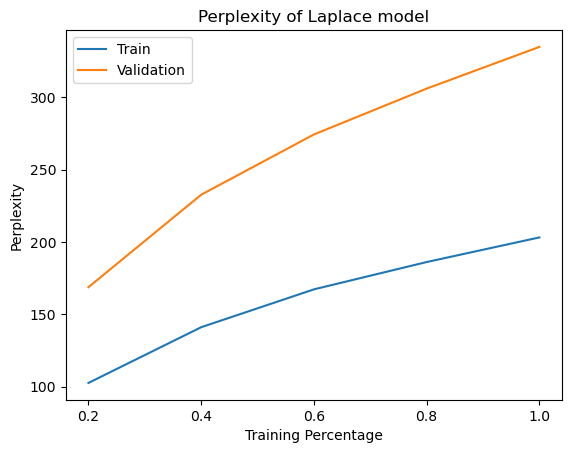

In [50]:
def plot_perplexity_train_size(train_sizes, perplexity_train, perplexity_val, title, file_name=None):
    fig, ax = plt.subplots()
    ax.plot(train_sizes, perplexity_train, label='Train')
    ax.plot(train_sizes, perplexity_val, label='Validation')
    ax.set_xlabel('Training Percentage')
    ax.set_ylabel('Perplexity')
    ax.set_xticks(train_sizes)
    ax.set_title(title)
    ax.legend()
    if file_name:
        plt.savefig(file_name)
    else:
        plt.show()
    
li_perps_train, laplace_perps_train = zip(*perplexity_train)
li_perps_val, laplace_perps_val = zip(*perplexity_val)
plot_perplexity_train_size(train_sizes, li_perps_train, li_perps_val, 'Perplexity of LI model', './figs/li_perplexity_train_size.png')
plot_perplexity_train_size(train_sizes, laplace_perps_train, laplace_perps_val, 'Perplexity of Laplace model', './figs/laplace_perplexity_train_size.png')

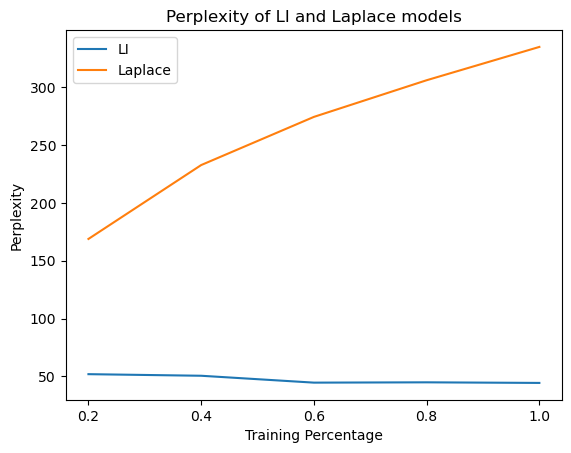

In [51]:
# Plot laplace vs li perplexity on validation set based on training size
plt.plot(train_sizes, li_perps_val, label='LI')
plt.plot(train_sizes, laplace_perps_val, label='Laplace')
plt.xlabel('Training Percentage')
plt.ylabel('Perplexity')
plt.xticks(train_sizes)
plt.title('Perplexity of LI and Laplace models')
plt.legend()
plt.savefig('./figs/li_vs_laplace_perplexity_train_size.png')

In [4]:
li_ngram = ngram.NGRAM_Model(4, scoring_method='LI_grid_search')
laplace_gram = ngram.NGRAM_Model(4)

In [5]:
li_ngram.train(train_corpus)

KeyboardInterrupt: 

In [ ]:
laplace_gram.train(train_corpus)

### Visuals for perplexity of LI model vs Laplace Model based on Corpus size and ngram size

In [ ]:
def translate_sents(generate_sentences):
    SPECIAL_TOKENS = [ngram.SENTENCE_BEGIN, ngram.SENTENCE_END]
    updated_sentences = [list(filter(lambda x: x not in SPECIAL_TOKENS, s)) for s in generate_sentences]
    # join sentences
    updated_sentences = [' '.join(s) for s in updated_sentences]
    return updated_sentences

In [ ]:
laplace_gen = laplace_gram.generate(10)
formatted_laplace = translate_sents(laplace_gen)

In [ ]:
li_gen = li_ngram.generate(10)
formatted_li = translate_sents(li_gen)

In [ ]:
GEN_LAPACE_PATH = 'data/laplace_gen.txt'
GEN_LI_PATH = 'data/li_gen.txt'
with open(GEN_LAPACE_PATH, 'w') as f:
    f.write('\n'.join(formatted_laplace))
with open(GEN_LI_PATH, 'w') as f:
    f.write('\n'.join(formatted_li))